In [1]:
import pandas as pd

df = pd.read_csv("./mushrooms.csv")


df = pd.get_dummies(df)

df = df.drop("class_e", axis = 1)

df.head()

,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split

X = df.drop("class_p", axis = 1).values
y = df["class_p"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

1.0


In [4]:
from sklearn.tree import export_graphviz

tree = export_graphviz(model, None, 
                       feature_names = df.drop("class_p", axis = 1).columns.values,
                       class_names = ["essbar", "nicht essbar"],
                       rounded = True,
                       filled = True)

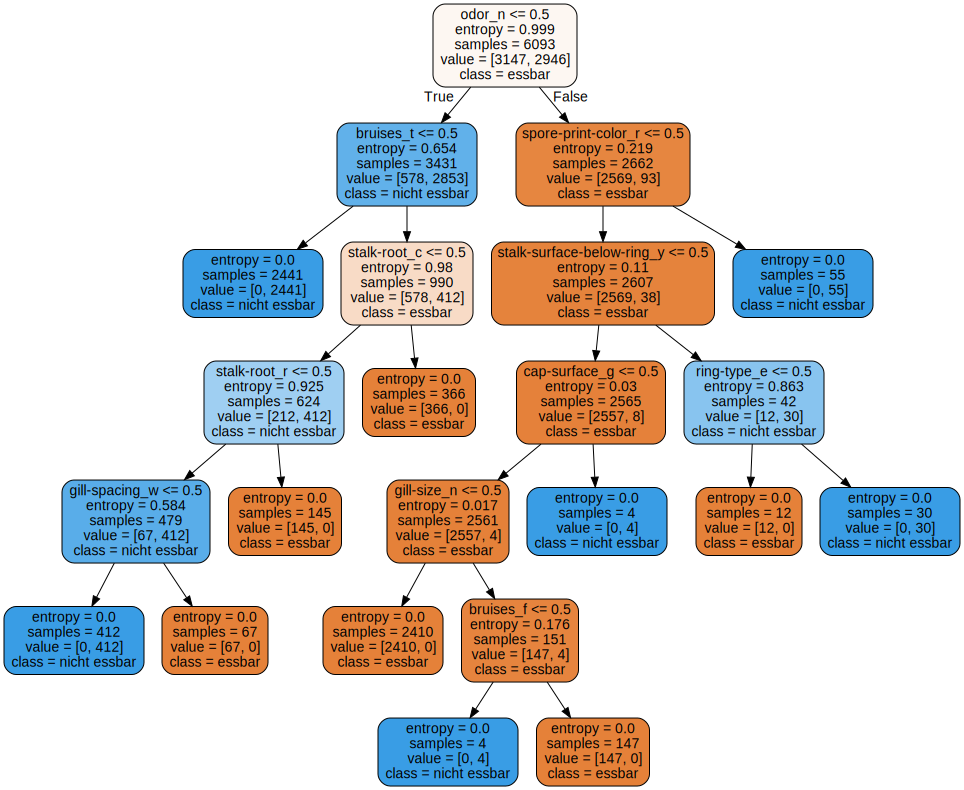

In [5]:
import graphviz
 
graphviz.Source(tree)